# ECON622: Computational Economics with Data Science Applications

Overparameterization, Implicit Bias, and Double-Descent

Jesse Perla (University of British Columbia)

# Overview

## Summary

-   Given the previous lectures on deep-learning, we can now come back
    to optimization methods and regularization
-   At this point you should be convinced that:
    1.  It is possible to fit very approximations with high-dimensional
        parameters, far more than the number of data points (i.e.,
        **overparameterized**)
    2.  Having flexible functional forms in our $\mathcal{H}$ lets us
        use representations which may help us in many ways

## Remain Skeptical!

1.  Given our understanding of the classic bias-variance tradeoff

    -   What about overfitting?

2.  The ERM process for complicated problems is not globally convex

    -   First-order methods only help me go to (convex)local optima?
    -   With overparameterization, are local optima even convex?

## Overview

**Warning:** active, incomplete literature in math, CS, and statistics.

But we can still give some intuition:

1.  First explore why the bias-variance tradeoff breaks down and give a
    mental model for how we can solve problems in high dimensions
2.  Then explore the optimization process in high dimensions and explain
    why with enough dimensions (and randomness) it becomes easier
3.  Finally, explain different sources of regularization (implicit and
    explicit) that occur during optimization, which helps explain why
    double descent can occur

# Double-Descent and the Bias-Variance Tradeoff

## Recall the Decomposition of Errors from ERM

-   Without repeating the entire notation, we established our goal as
    minimizing the difference between the ideal $$
    \mathbb{E}_{\mathcal{D} \sim p^*}\left[\min_{f \in \mathcal{H}} R(f, \mathcal{D}) - \min_{f \in \mathcal{F}} R(f, p^*)\right] = \varepsilon_{app}(\mathcal{H}) + \varepsilon_{est}(\mathcal{H})
    $$

-   That is, a classic tradeoff between approximation error and
    estimation error given some true distribution $p^*$ and some samples
    $\mathcal{D}$

## The Bias-Variance Tradeoff

-   Richer, deeper models enable better representations
    -   Can we find them given the massive number of parameters?
    -   Or do they overfit, find spurious patterns which fail to
        generalize?
-   Classic Bias-Variance tradeoff in statistics suggests a suite spot
    -   Too few parameters and you get too much “bias”, high
        $\varepsilon_{app}(\mathcal{H})$
    -   As you approach the number of parameters to the number of data
        points, you get too much “variance”, high
        $\varepsilon_{est}(\mathcal{H})$
    -   At the “interpolation threshold” it fits perfectly (i.e., the
        training error is zero) but the generalization is terrible
-   So classic statistics suggests looking for the sweet spot below the
    interpolation threshold

## Classic Statistics is (Often) Wrong!

**The solution to overfitting is to keep adding more parameters**

-   The evaluation criteria here is the correct one: generalization
    performance
-   Your intuition should be that this requires some sort of
    regularization
-   In most of these methods you will “interpolate” the training data
    for zero training loss

## Some References

-   [Reconciling modern machine-learning practice and the classical
    bias–variance trade-off](https://arxiv.org/abs/1812.11118)
-   [Deep Double Descent: Where Bigger Models and More Data
    Hurt](https://arxiv.org/pdf/1912.02292.pdf)
-   [Loss landscapes and optimization in over-parameterized non-linear
    systems and neural networks](https://arxiv.org/pdf/2003.00307.pdf)
-   [Fit without fear: remarkable mathematical phenomena of deep
    learning through the prism of
    interpolation](https://arxiv.org/pdf/2105.14368.pdf)
-   Also includes Linear models:
    -   [Benign Overfitting in Linear
        Regression](https://arxiv.org/pdf/1906.11300.pdf)
    -   [Surprises in High-Dimensional Ridgeless Least Squares
        Interpolation](https://arxiv.org/pdf/1903.08560.pdf)

## Classic Statistics: Single Descent

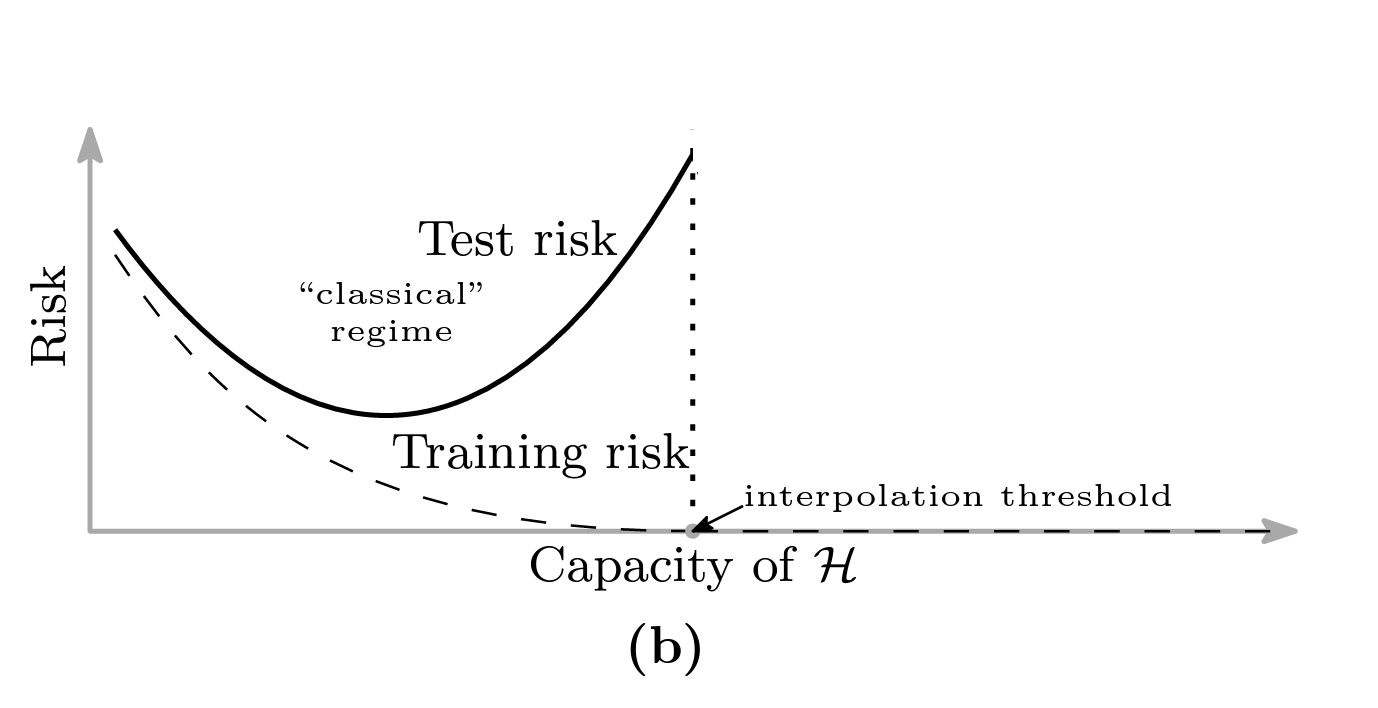

## Double Descent

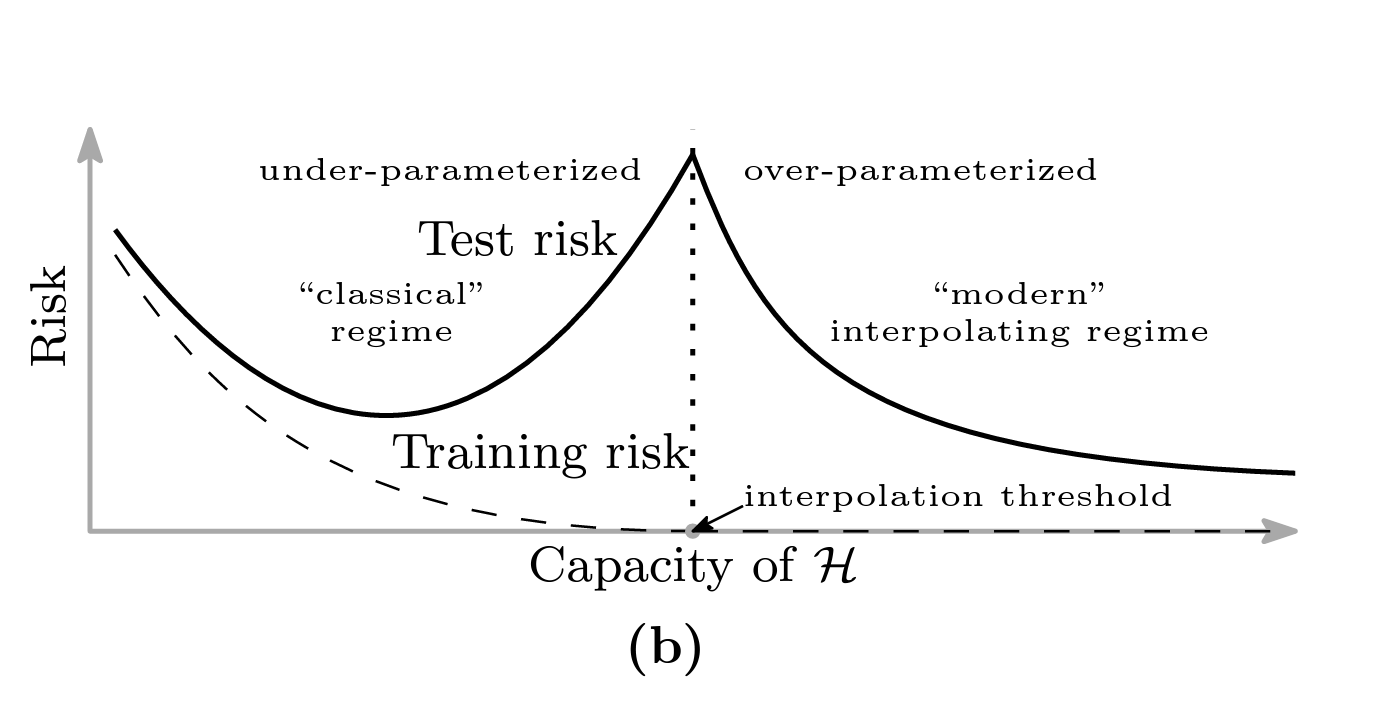

## Example Fitting Small Number of Data Points

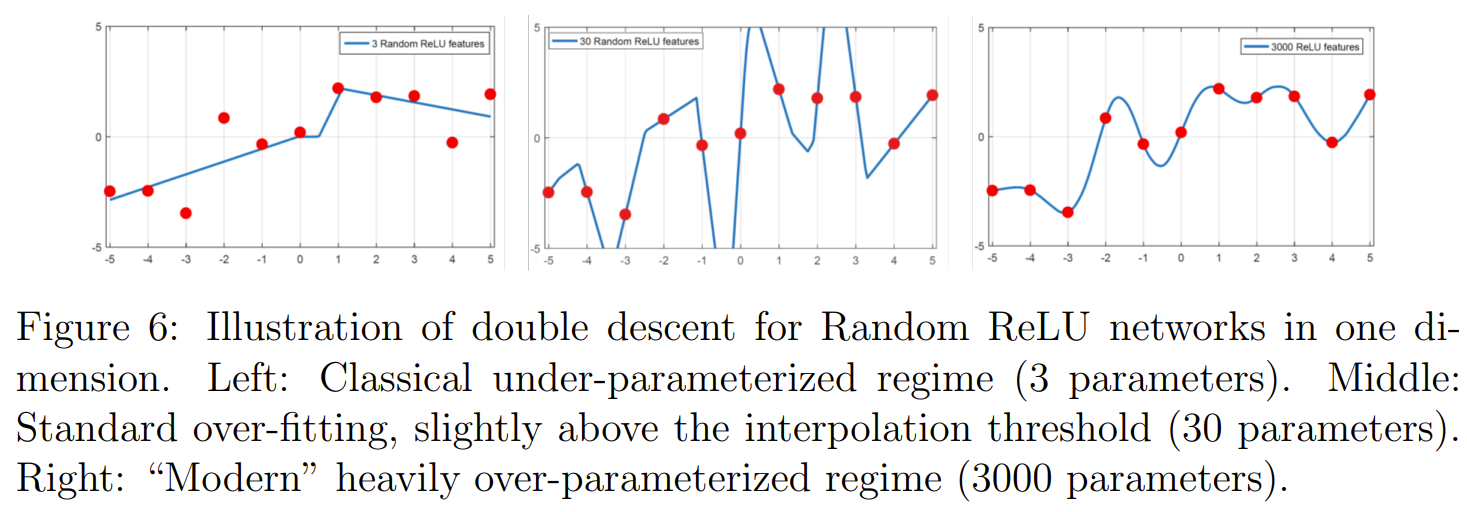

## Example with Increasing “Width” of Neural Network

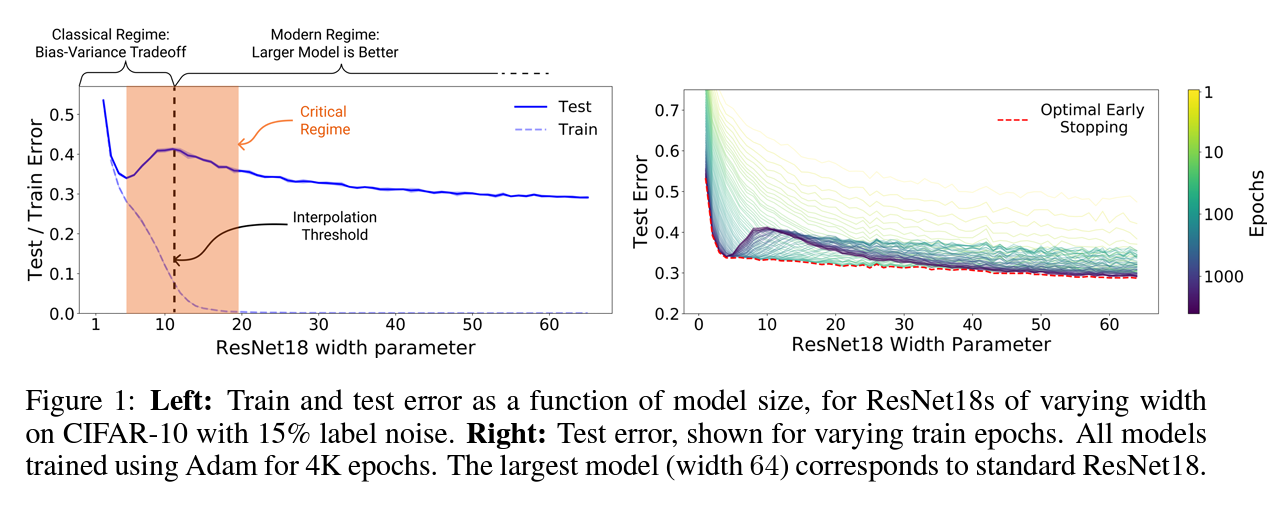

## Overparameterized Models Interpolate

-   One interpretation is that ML optimization methods with sufficient
    parameters find a min-norm interpolating solution. Minimizing ERM:
    $$
    \min_{f \in \mathcal{H}} \frac{1}{N}\sum_{n=1}^N \ell(f, x_n, y_n)
    $$

-   With large enough $\mathcal{H}$ this interpolates,
    i.e. $\ell(f, x_n, y_n) = 0$ for all $n$

-   Remember overdetermined LLS and the ridgeless regression

    -   This did not require enormous amounts of data

## Min-Norm Interpretation

-   With first-order optimizers can often interpret as solving

$$
\begin{aligned}
\min_{f \in \mathcal{H}} &||f||_S\\
 &\text{ s.t. } \ell(f, x, y) = 0,\,\text{ for all } (x, y) \in \mathcal{D}
\end{aligned}
$$

-   Where $S$ is some (semi-)norm we generally cannot characterize
    -   In some cases we can prove this is Sobolev 1,2 (e.g.,with LLS)
    -   In practice, chooses smooth functions (Occam’s Razor)
-   Whether these are the correct (i.e., generalizable) solutions
    depends on whether the $S$ aligns with the properties of the true
    $p^*(x,y)$
    -   Having lots of data is neither necessary nor sufficient

# Loss Landscapes in Overparameterized Models

## Overparameterized ERM Has Many Global Minima

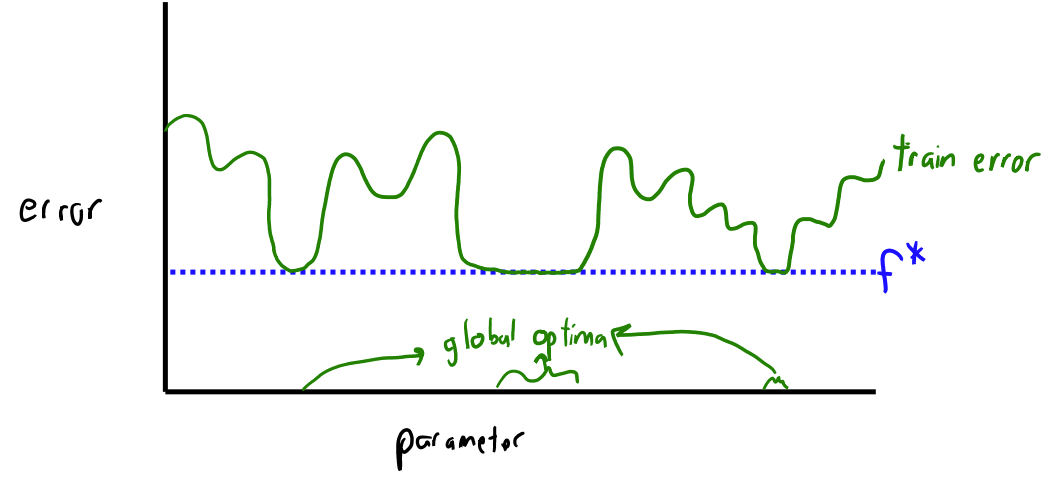

-   With overparameterization, there are many global minima
-   In high dimensions the global minima become increasingly connected

## Not All Global Minima are Alike

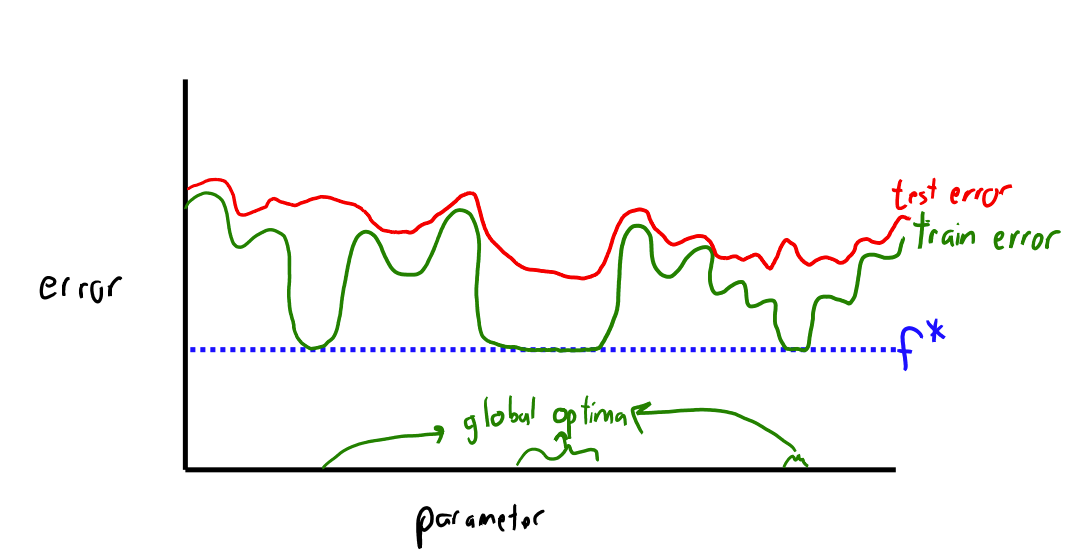

-   Some parameters generalize (estimated with test error) better than
    others
-   Intuition: better with more “volume” of parameters at low test error

## Flat vs. Sharp Geometry

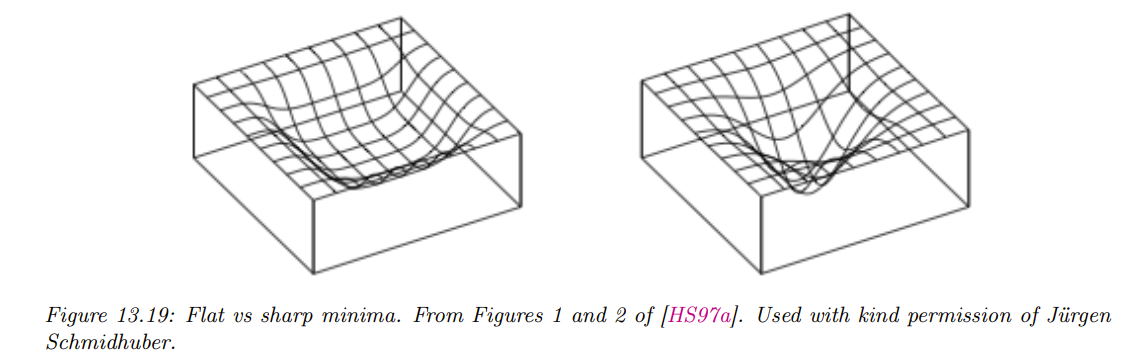

-   We often think of flatter geometry near minima as worse (e.g., not
    identified)
-   With overparameterization this is the wrong intuition.
    -   Flat minima generalize better because they have similar loss
        over a larger volumes of parameter space. Less dependent on
        individual data

## SGD Finds Flat Minima

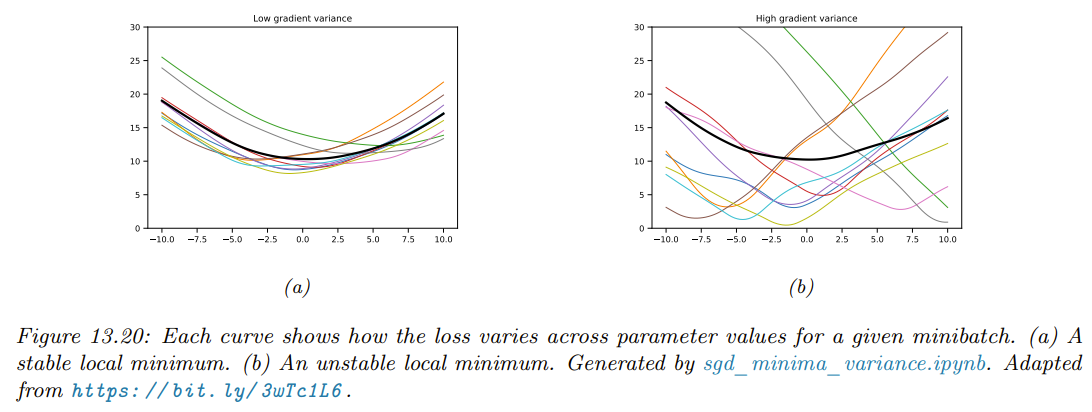

-   SGD finds finds more stable local minima, less sensitive to
    underlying data

## Overparameterized Loss Landscapes

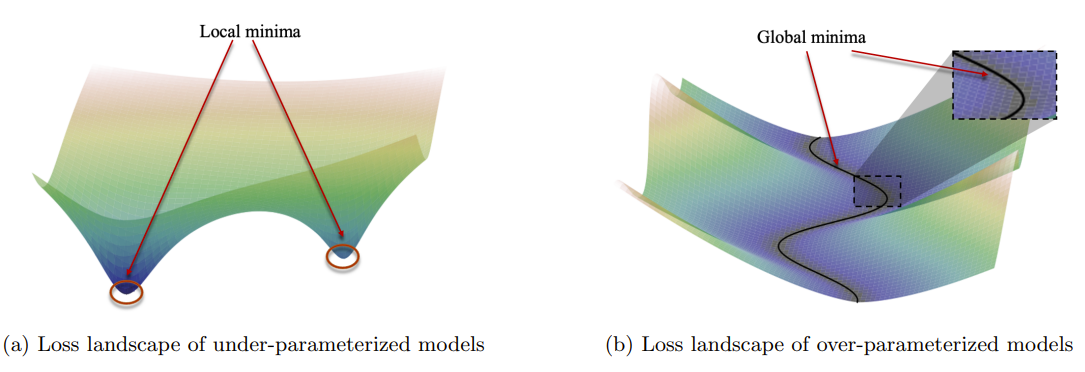

-   Intuition of optimization in low dimensions often breaks down in
    high dimensions and with overparameterization
-   Many classic examples where adding in more parameters makes
    optimization easier (e.g., more degrees of freedom to move)

## Loose Intuition from this Literature

-   **Warning:** this literature is a work in progress, and hard to
    prove things formally for general problems
-   However some loose intuition from [Loss landscapes and optimization
    in over-parameterized non-linear systems and neural
    networks](https://arxiv.org/pdf/2003.00307.pdf) and others
-   As you move from low-dimensional, underparameterized to
    high-dimensional overparameterized problems:
    -   All local minima increasingly become global minima (i.e.,
        interpolation)
    -   Global minima are increasingly connected
    -   Nothing is convex, but increasingly the minima seem to fulfill a
        related condition ($PL^*$) which is all we need

## Interpretations on the Importance of Flatness

-   Bayesian Interpretations:
    -   Flat corresponds to more posterior uncertainty (see [ProbML Book
        1](https://probml.github.io/pml-book/book1.html) Section 13.5.6
        and [ProbML Book
        2](https://probml.github.io/pml-book/book2.html) Section 17.4.1)
    -   Larger region in parameter space with similar loss
    -   Less sensitive to small changes in the data (i.e., overfitting)

# Regularization

## Implicit/Inductive Regularization

-   The theme of much of this literature is on the idea of
    “hidden/implicit/inductive” bias/regularization that occurs during
    optimization of ML models
-   We saw this already in the LLS section where we showed how
    underdetermined LLS solved with most algorithms ends up at the
    ridgeless regression solution
-   This does not mean that implicit regularization is always enough,
    but it helps us understand its role (and whether it fights against
    us).

## Sources of Regularization

-   We see this with just gradient descent in LLS, so not specific to
    nonlinear, having lots of parameters, or stochastic optimization
-   SGD itself has regularizing effects
-   Sometimes manual regularization is needed
    -   Early stopping, Weight decay (L2 regularization), etc.
-   See [ProbML Book 1](https://probml.github.io/pml-book/book1.html)
    Section 13.5.6
-   See [Mark Schmidt’s CPSC440 Notes on Double-Descent
    Curves](https://www.cs.ubc.ca/~schmidtm/Courses/440-W22/L7.pdf) for
    more on regularization

## Stochastic Gradients

-   See [ProbML Book 1](https://probml.github.io/pml-book/book1.html)
    Section 13.5.6
-   As we saw before, randomness in SGD and its variants can help us
    find flatter minima
-   The key is that it is the right sort of noise, which helps us avoid
    sharp minima and concentrate on flatter minima
-   This is true even if all local minima are global minima and
    connected
    -   The connected minima might even make it easier to traverse to
        the flatter regions

# No Free Lunch!

## Choose Algorithms for the Problem Class

-   It is worth ending with a restatement of the [no free lunch
    theorems](https://www.cs.ubc.ca/~hutter/earg/papers07/00585893.pdf)
    -   No optimization algorithm is universally superior; any
        algorithm’s performance is problem-dependent, such that its
        average performance across all possible problems is the same as
        that of any other algorithm.
-   In practice, this means that we will need to carefully choose the
    optimization methods, hypothesis classes, and regularization with a
    particular problem in mind by understanding the problem class well
-   Luckily: it seems many problems in economics are very similar, so we
    can use priors to choose methods, and HPO software lets us
    experiment